In [52]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df=pd.read_csv("Bank.CSV")

In [21]:
df.head()

,age,duration,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,210,1.4,93.444,-36.1,4.963,5228.1,0
1,53,138,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,339,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,185,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,137,-2.9,92.201,-31.4,0.869,5076.2,1


In [22]:
X=df.drop("y",axis=1)
y=df["y"]

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [24]:
model=LogisticRegression()

In [25]:
model.fit(X_train,y_train)

LogisticRegression()

In [26]:
model.intercept_

array([0.0038966])

In [27]:
model.coef_

array([[ 0.00102985,  0.00453547, -0.21666419,  0.42441402,  0.05623667,
        -0.27694855, -0.0078621 ]])

In [28]:
predictions=model.predict(X_test)

In [29]:
accuracy_score(y_test,predictions)

0.9060451565914057

In [33]:
model.predict_proba(X_test)

array([[0.93744301, 0.06255699],
       [0.67199288, 0.32800712],
       [0.99149543, 0.00850457],
       ...,
       [0.99216233, 0.00783767],
       [0.94365188, 0.05634812],
       [0.99442533, 0.00557467]])

In [34]:
confusion_matrix(y_test,predictions)

array([[7157,  168],
       [ 606,  307]], dtype=int64)

Text(33.0, 0.5, 'Actual')

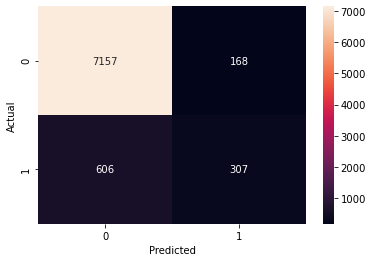

In [39]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [40]:
confusion_matrix(y_test,predictions).ravel()

array([7157,  168,  606,  307], dtype=int64)

In [41]:
tn,fp,fn,tp=confusion_matrix(y_test,predictions).ravel()

In [42]:
tn

7157

In [43]:
fp

168

In [44]:
fn

606

In [45]:
tp

307

In [47]:
acc=accuracy_score(y_test,predictions)
acc

0.9060451565914057

In [48]:
MCE=1-acc
MCE

0.09395484340859428

In [49]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7325
           1       0.65      0.34      0.44       913

    accuracy                           0.91      8238
   macro avg       0.78      0.66      0.70      8238
weighted avg       0.89      0.91      0.89      8238



In [54]:
fpr,tpr,_=roc_curve(y_test,model.predict_proba(X_test)[:,:1])

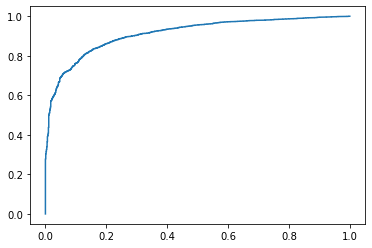

In [57]:
plt.plot(tpr,fpr)